This notebook was created using Python 2.7.12 kernel. Mentioning the Python version becomes more important in case where this document is executed with Python 3.5 kernel and it may turn out that some part of the python code might not be compatible with Python 3.5.

# Exploring features available in Jupyterhub environment

At the moment, the current Jupyterhub environment features 2 python kernels (python 2.7.12 and python 3.5.2). A notebook document (existing one or a new one) is opened with either of these kernels. Irrespective of the choice of the kernel, it is a feature of the notebook server that a bash kernel is also started along with chosen kernel. This means unix commands can also be executed in the code cells. In order to do this, the command needs to be prefixed with "!" character.

In [1]:
!ls

Jupyterhub_features.ipynb  Meteogram_sample_dataset.nc	README.md


In [2]:
!head README.md

Jupyterhub notebooks

A collection of notebook examples to get started with using the jupyterhub service.


One can also use cell magic "%%bash" to execute unix commands. This is particularly useful in case of a multi line command.

In [3]:
%%bash

module list

Currently Loaded Modulefiles:
  1) cdo/1.9.0-gcc48        3) texlive/2016
  2) netcdf_c/4.3.2-gcc48   4) python/2.7.12


Notice that this environment comes preloaded with few modules like `cdo`, `netcdf` and `texlive`. The `python` version depends on the selected kernel.

Since `cdo` module is already loaded into the environment, we can execute `cdo` commands in the notebook.

It is important to note that this is a frozen environment. Meaning, no new modules can be loaded or these module versions cannot be swapped. I guess for the most part, this minimal environment must be good enough.

Likewise, for `python` quite a decent set of packages are available.

Before continuing further it is probably useful to take a moment and quickly go through the following links as they cover some of the most common features of a notebook and most of them are also valid in this environment.

 - http://quasiben.github.io/dfwmeetup_2014/#/
 - http://arogozhnikov.github.io/2016/09/10/jupyter-features.html

Here, I pick a few from these sources...

### embedding sites

https://jupyter.brynmawr.edu/services/public/dblank/Jupyter%20Notebook%20Users%20Manual.ipynb

In [4]:
from IPython.display import HTML

HTML('<iframe src=https://jupyter.brynmawr.edu/services/public/dblank/Jupyter%20Notebook%20Users%20Manual.ipynb width=900 height=700></iframe>')

### Inline Audio

Please be warned that this audio may not be pleasent. 

In [5]:
import numpy as np
from IPython.display import Audio

framerate = 44100
t = np.linspace(0, 5, framerate * 5)
data = np.sin(2 * np.pi * 220 * t**2)
Audio(data, rate=framerate)

### embedding video

The youtube video shown here is from Jake Vanderplas. He talks about "Reproducible Data Analysis in Jupyter notebook". It is a series of 10 short 5 minute videos showing off a typical work flow using the notebooks.

In [6]:
from IPython.display import YouTubeVideo

YouTubeVideo("_ZEWDGpM-vM")

Embedding a series of videos...

The first 4 videos in same series is worth checking out.

In [7]:
from IPython.display import display

for name in ("_ZEWDGpM-vM", "yUNBVzQfugg", "J45NJ0pJXWQ", "VdLdfF_uuSQ"):
    display(YouTubeVideo(name))

## $\LaTeX$

In [8]:
%%latex

\begin{align}

\frac{\partial u}{\partial t} + \nabla \cdot \left( \boldsymbol{v} u - D\nabla u \right) = f

\end{align}

<IPython.core.display.Latex object>

The same equation can also also be rendered in a markdown cell like this: $\frac{\partial u}{\partial t} + \nabla \cdot \left( \boldsymbol{v} u - D\nabla u \right) = f$

### inline plots

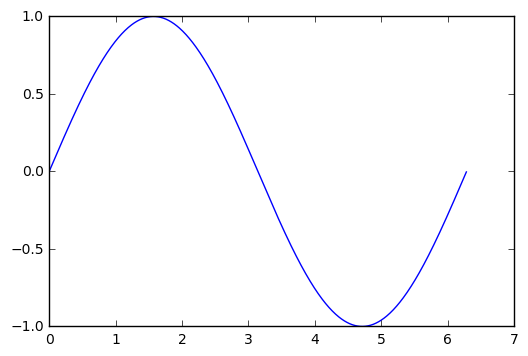

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0,2*np.pi,.01)
plt.plot(x,np.sin(x))

### Expanding cell width to fill the screen width

In [10]:
display(HTML("<style>.container { width:100% !important; }</style>"))

The things covered so far might give you some idea of what can be done in a notebook. Although not everything is needed all the time, it is good to know that these features exist. The main take away is that one can take advantage  of them to create a rich document to enhance the story telling part.

# Working with netcdf file


A more realistic example using these features is to work with real data and show a typical work-flow. In this case it is a sample meteogram dataset from ICON-LEM-DE simulations.

Data URL: https://swift.dkrz.de/v1/dkrz_1e33ba3a-9ecb-452f-93b9-583cf4a66e57/jupyterhub_sample_datasets/Meteogram_sample_dataset.nc



Downloading the data

In [11]:
import requests
import shutil
import os

url = "https://swift.dkrz.de/v1/dkrz_1e33ba3a-9ecb-452f-93b9-583cf4a66e57/jupyterhub_sample_datasets/Meteogram_sample_dataset.nc"
filename = "Meteogram_sample_dataset.nc"

if not os.path.exists(filename):
    r = requests.get(url, stream=True)
    if r.status_code == 200:
        with open(filename, 'wb') as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f)     

In [12]:
!ls -lh

total 16M
-rw-r--r-- 1 k202101 k20200 3.1M Jan 26 03:18 Jupyterhub_features.ipynb
-rw-r--r-- 1 k202101 k20200  13M Jan 25 19:49 Meteogram_sample_dataset.nc
-rw-r--r-- 1 k202101 k20200  127 Jan 24 14:50 README.md


The file is 13MB in size. As mentioned earlier we can use `cdo` to perform some basic operations on this file.

In [13]:
!cdo showvar $filename

 T SHFL LHFL T2M
cdo showname: Processed 4 variables ( 0.03s )


In [14]:
!cdo sinfo $filename

   File format : NetCDF4
    -1 : Institut Source   Steptype Levels Num    Points Num Dtype : Parameter ID
     1 : MPIMET   @        instant     150   1         1   1  F64  : -1            
     2 : MPIMET   @        instant       1   2         1   1  F64  : -2            
     3 : MPIMET   @        instant       1   2         1   1  F64  : -3            
     4 : MPIMET   @        instant       1   2         1   1  F64  : -4            
   Grid coordinates :
     1 : generic                  : points=1
   Vertical coordinates :
     1 : height                   : levels=150
                         height_2 : 20808.9 to 402.2759 m
     2 : surface                  : levels=1
   Time coordinate :  9601 steps
     RefTime =  2013-05-11 00:00:00  Units = seconds  Calendar = proleptic_gregorian
  YYYY-MM-DD hh:mm:ss  YYYY-MM-DD hh:mm:ss  YYYY-MM-DD hh:mm:ss  YYYY-MM-DD hh:mm:ss
  2013-05-11 00:00:00  2013-05-11 00:00:09  2013-05-11 00:00:18  2013-05-11 00:00:27
  2013-05-11 00:00:36  201

So we have 4 variables in this dataset. Measurements for the full day with a temporal frequency of 9 seconds.

We can also use `ncdump -h` command to get the header information.

In [15]:
!ncdump -h $filename | head -n 50

netcdf Meteogram_sample_dataset {
dimensions:
	time = UNLIMITED ; // (9601 currently)
	height_2 = 150 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "time" ;
		time:units = "seconds since 2013-05-11 00:00:00" ;
		time:calendar = "proleptic_gregorian" ;
		time:axis = "T" ;
	double height_2(height_2) ;
		height_2:standard_name = "height" ;
		height_2:long_name = "height" ;
		height_2:units = "m" ;
		height_2:positive = "up" ;
		height_2:axis = "Z" ;
	double T(time, height_2) ;
		T:long_name = "Temperature" ;
		T:name = "T" ;
		T:unit = "K" ;
		T:group_id = 1 ;
		T:nlevs = 150 ;
	double SHFL(time) ;
		SHFL:long_name = "sensible heat flux (surface)" ;
		SHFL:name = "SHFL" ;
		SHFL:unit = "W/m2" ;
		SHFL:group_id = 3 ;
		SHFL:comment = "surface variable" ;
	double LHFL(time) ;
		LHFL:long_name = "latent heat flux (surface)" ;
		LHFL:name = "LHFL" ;
		LHFL:unit = "W/m2" ;
		LHFL:group_id = 3 ;
		LHFL:comment = "surface variable" ;
	double T2M(time) ;
		T

This provides quite a good insight into the dataset.

The dataset contains 3 surface variables ($SHFL$, $LHFL$ and $T2M$) and 1 profile variable (a.k.a volume variable) $T$ with 150 height levels.

we open this dataset in python using [xarray](http://xarray.pydata.org/en/stable/) package and visualize the data

In [16]:
import xarray as xr

ds = xr.open_dataset(filename)
ds

<xarray.Dataset>
Dimensions:   (height_2: 150, time: 9601)
Coordinates:
  * time      (time) datetime64[ns] 2013-05-11 2013-05-11T00:00:09 ...
  * height_2  (height_2) float64 2.081e+04 2.045e+04 2.014e+04 1.983e+04 ...
Data variables:
    T         (time, height_2) float64 215.6 215.6 215.6 215.6 215.7 215.8 ...
    SHFL      (time) float64 8.147 5.141 5.581 5.57 6.192 5.731 5.944 5.906 ...
    LHFL      (time) float64 -3.025 -2.587 -2.726 -2.623 -2.817 -2.594 ...
    T2M       (time) float64 283.2 283.2 283.2 283.2 283.2 283.2 283.2 283.2 ...
Attributes:
    _NCProperties:     version=1|netcdflibversion=4.4.1.1|hdf5libversion=1.8.14
    CDI:               Climate Data Interface version 1.9.2 (http://mpimet.mp...
    Conventions:       CF-1.6
    history:           Wed Jan 24 13:55:31 2018: cdo selvar,T,T2M,LHFL,SHFL 1...
    source:            @
    institution:       Max Planck Institute for Meteorology
    title:             ICON Meteogram File
    comment:           HDCP2 Sammelac

The following line ensures that we have a inline plot

In [17]:
%matplotlib inline

plotting sensible heat flux

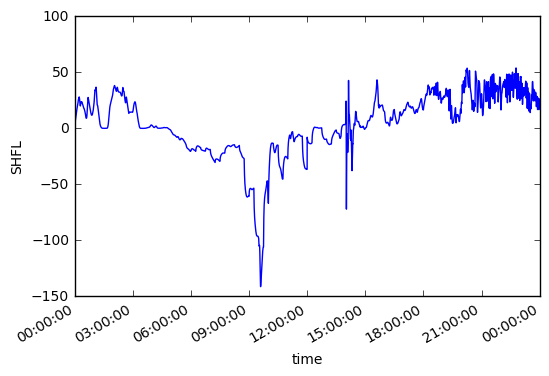

In [18]:
ds['SHFL'].plot()

we can pass some arguments to plot function to customize it.

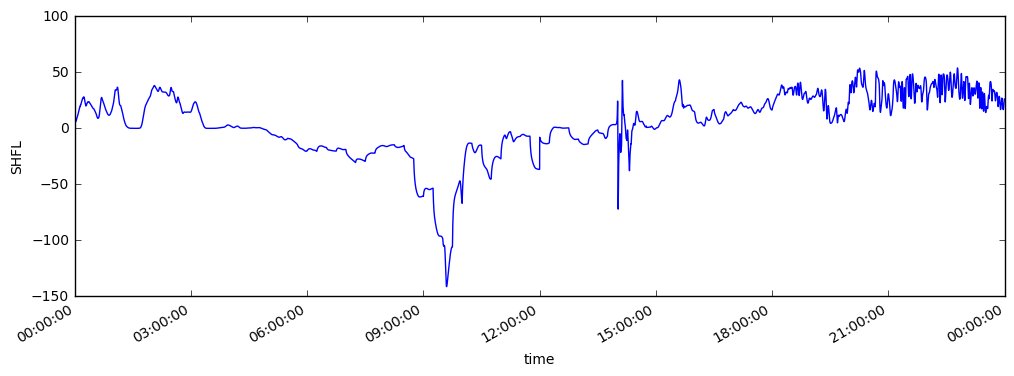

In [19]:
ds['SHFL'].plot(figsize=(12, 4))

We can convert the dataset to pandas series object and plot. This will produce the same plot but formatting of the time labels is altered.

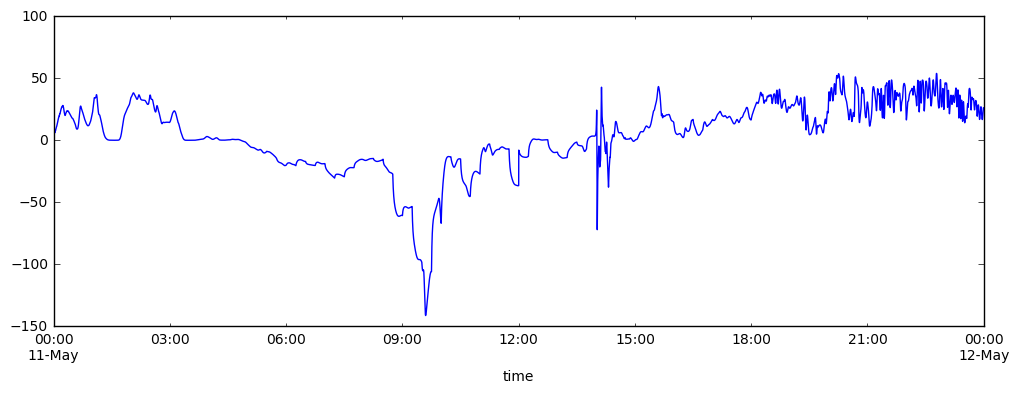

In [20]:
ds['SHFL'].to_pandas().plot(figsize=(12, 4))

To visualize sensible and latent heat fluxes in the same plot, the dataset is converted to a dataframe object.

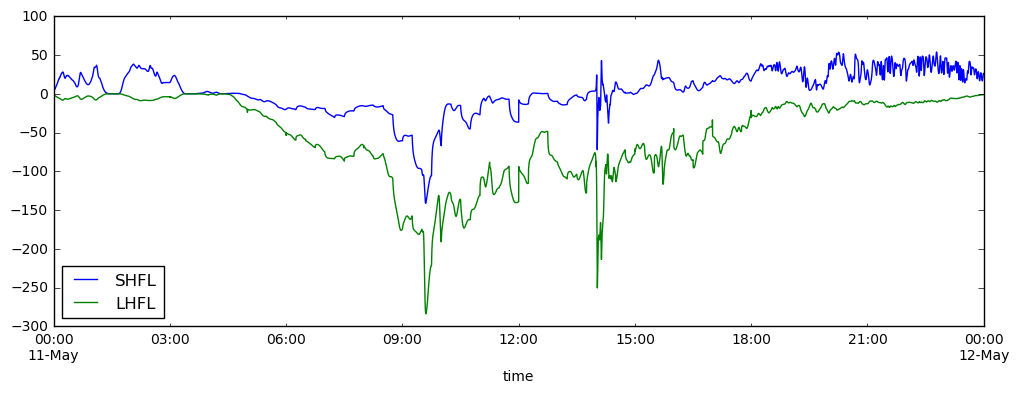

In [21]:
fluxes = ds[['SHFL', 'LHFL']].to_dataframe()
fluxes.plot(figsize=(12, 4))

Instead of plotting, we can also take a look at the data.

top five rows

In [22]:
fluxes.head()

SHFL      LHFL
time                                   
2013-05-11 00:00:00  8.146858 -3.025265
2013-05-11 00:00:09  5.140743 -2.587417
2013-05-11 00:00:18  5.580678 -2.725939
2013-05-11 00:00:27  5.569650 -2.622955
2013-05-11 00:00:36  6.191970 -2.816991

In [23]:
fluxes.tail()

SHFL      LHFL
time                                    
2013-05-11 23:59:24  25.527535 -1.143051
2013-05-11 23:59:33  26.024381 -1.136174
2013-05-11 23:59:42  26.282030 -1.135403
2013-05-11 23:59:51  26.327582 -1.138894
2013-05-12 00:00:00  26.183319 -1.144655

Resamplling data to 10 minute frequency.

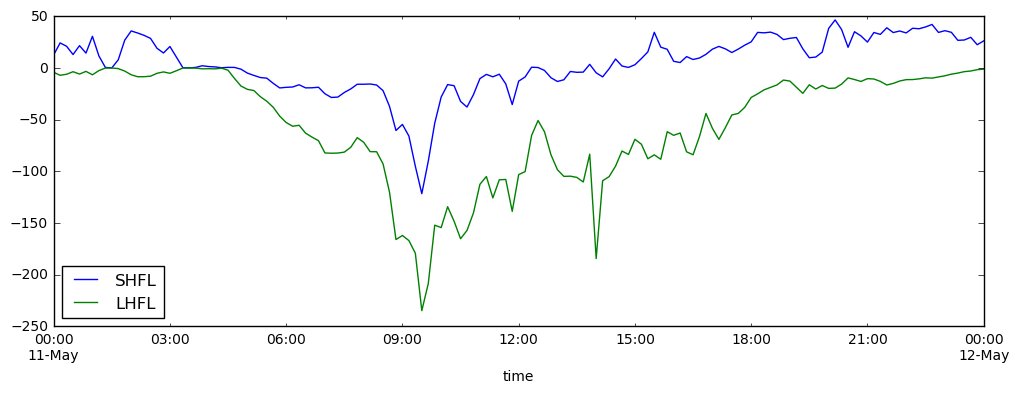

In [24]:
fluxes_10min = fluxes.resample('10min').mean()
fluxes_10min.plot(figsize=(12, 4))

In [25]:
fluxes_10min.head()

SHFL      LHFL
time                                    
2013-05-11 00:00:00  12.673652 -4.167772
2013-05-11 00:10:00  24.247781 -7.099160
2013-05-11 00:20:00  20.975509 -6.078053
2013-05-11 00:30:00  12.999360 -3.620255
2013-05-11 00:40:00  21.582636 -5.885859

working with $T2M$ (temperature at 2 meters) will be similar, so skipping it.

Next, working with profile variable $T$ (temperature) which is a 2 dimensional data (time, height_2).

In [26]:
ds['T']

<xarray.DataArray 'T' (time: 9601, height_2: 150)>
[1440150 values with dtype=float64]
Coordinates:
  * time      (time) datetime64[ns] 2013-05-11 2013-05-11T00:00:09 ...
  * height_2  (height_2) float64 2.081e+04 2.045e+04 2.014e+04 1.983e+04 ...
Attributes:
    long_name:  Temperature
    name:       T
    unit:       K
    group_id:   1
    nlevs:      150

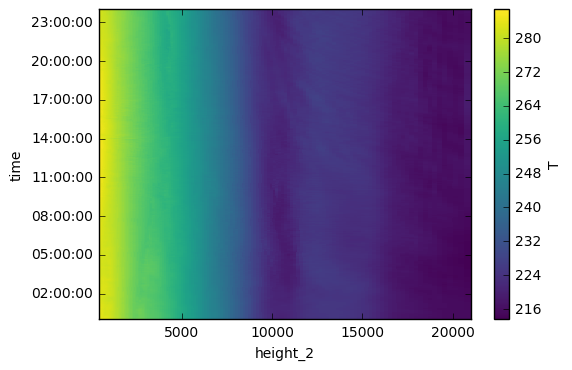

In [27]:
ds['T'].plot()

A better representation is shown when the data is transposed, so the axes are swapped.

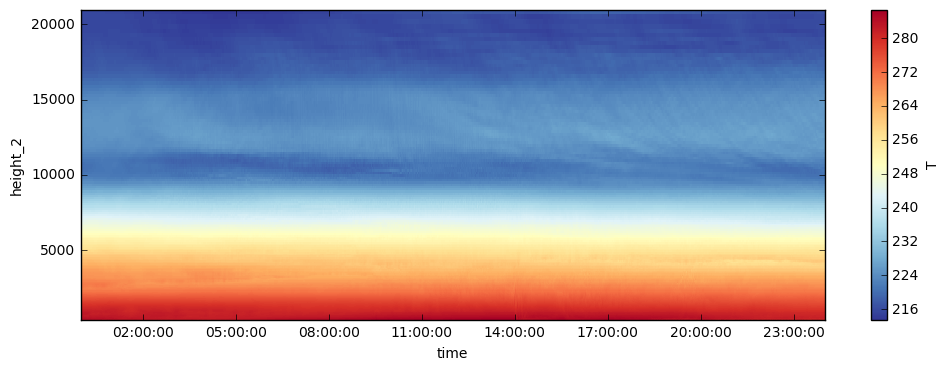

In [28]:
options = dict(figsize=(12, 4), cmap='RdYlBu_r')
ds['T'].transpose().plot(**options)

This 2d plot shows a complete picture of the temperature for whole day (every time step) and for all height levels. In practice, producing profile plot at a specific time stamp is a preferred way of visualizing the data.

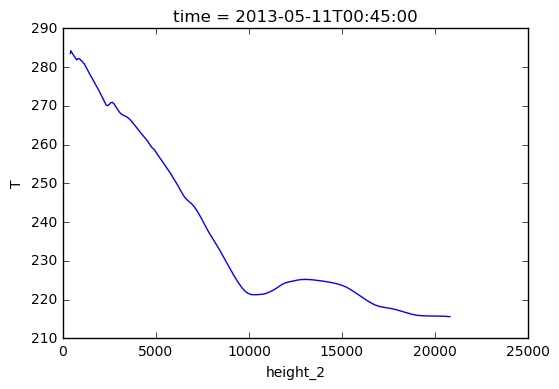

In [29]:
# selecting 300th time step
ds['T'].isel(time=300).plot()

The above plot looks better if the axes are swapped. Here the technique of transposing the data doesnot work (1 dimension data), so the 'height' information has to be explicitly passed as the second argument in the plotting function.

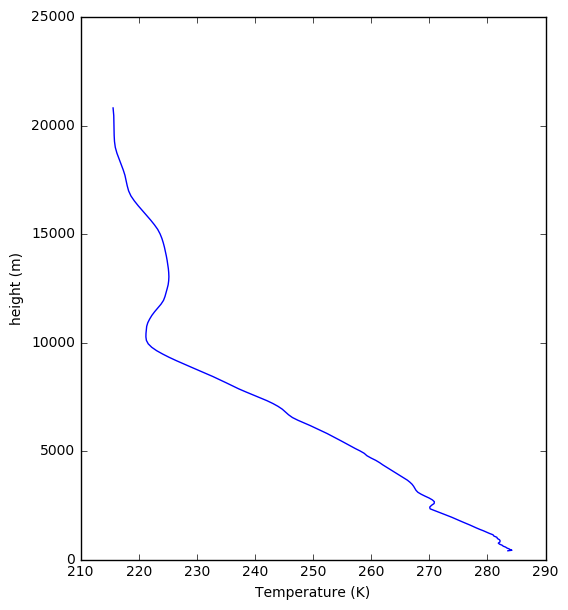

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 7))

T = ds['T'].isel(time=300)
ax.plot(T, T.height_2)
ax.set_ylabel('height (m)')
ax.set_xlabel('Temperature (K)')

Resampling to hourly profiles by taking means.

In [31]:
T = ds['T'].resample('1H', 'time', how='mean')

In [32]:
T.time

<xarray.DataArray 'time' (time: 25)>
array(['2013-05-11T00:00:00.000000000', '2013-05-11T01:00:00.000000000',
       '2013-05-11T02:00:00.000000000', '2013-05-11T03:00:00.000000000',
       '2013-05-11T04:00:00.000000000', '2013-05-11T05:00:00.000000000',
       '2013-05-11T06:00:00.000000000', '2013-05-11T07:00:00.000000000',
       '2013-05-11T08:00:00.000000000', '2013-05-11T09:00:00.000000000',
       '2013-05-11T10:00:00.000000000', '2013-05-11T11:00:00.000000000',
       '2013-05-11T12:00:00.000000000', '2013-05-11T13:00:00.000000000',
       '2013-05-11T14:00:00.000000000', '2013-05-11T15:00:00.000000000',
       '2013-05-11T16:00:00.000000000', '2013-05-11T17:00:00.000000000',
       '2013-05-11T18:00:00.000000000', '2013-05-11T19:00:00.000000000',
       '2013-05-11T20:00:00.000000000', '2013-05-11T21:00:00.000000000',
       '2013-05-11T22:00:00.000000000', '2013-05-11T23:00:00.000000000',
       '2013-05-12T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time 

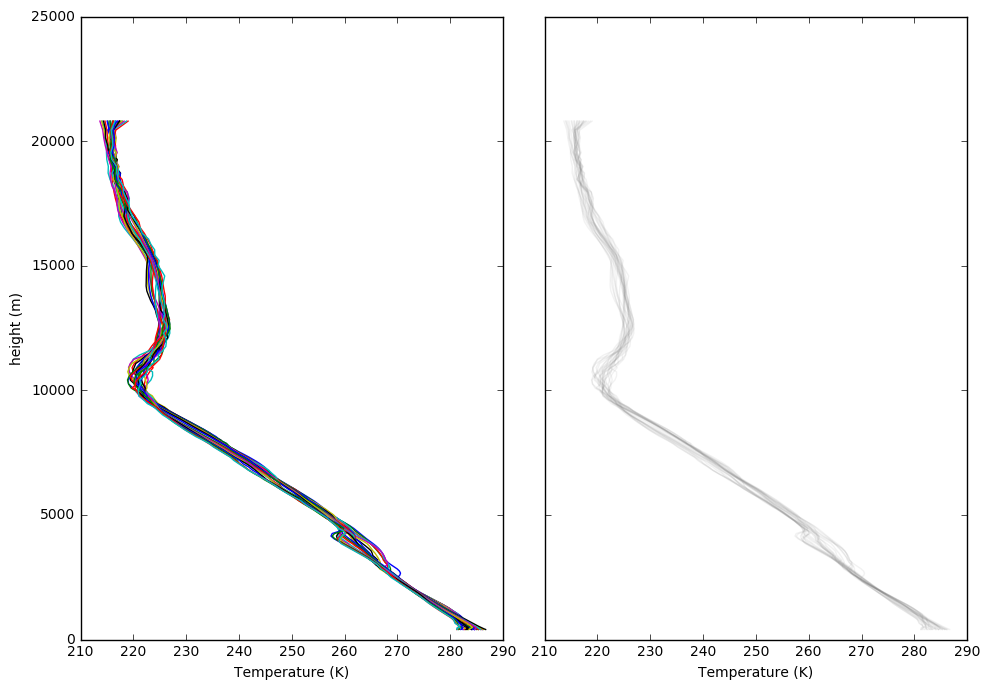

In [33]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 7))
for t in T:
    ax1.plot(t, t.height_2)
    ax2.plot(t, t.height_2, alpha=0.1, color='grey')
ax1.set_ylabel('height (m)')
ax1.set_xlabel('Temperature (K)')
ax2.set_xlabel('Temperature (K)')
f.tight_layout()

The above plot is an example for over-plotting. Setting a constant color and alpha value would result in a better representation of the data.

---

[Holoviews](http://holoviews.org/) is a very interesting plotting library. Since this package is available, repeating the profile plot exercise with it.


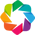

In [34]:
import pandas as pd
import holoviews as hv

# holoviews support matplotlib, bokeh and plotly backends for visualization
hv.extension('bokeh')

creating a profile plot for the first time-step

In [35]:
%%opts Curve [width=500 height=600 invert_axes=True show_grid=True]

hv.Curve(T[0])

:Curve   [height_2]   (T)

Notice that we did not change the dataset or pass the height information for get a proper plot as we have done in the earlier example. Setting 'invert_axis' to 'True' did the magic. 

In [36]:
%%opts Curve [width=500 height=600 invert_axes=True show_legend=False show_grid=True] (alpha=0.1 color='gray')

# creating a mapping of curve objects w.r.t time
curves = {pd.to_datetime(t.time.values): hv.Curve(t) for t in T}

# creating a holomap object out of curves
hmap = hv.HoloMap(curves, kdims=['Time']).relabel("Temperature profiles - Hourly")

# overlaying curves
hv.NdOverlay(hmap)

:NdOverlay   [Time]
   :Curve   [height_2]   (T)

'NdOverlay' plots all the curves in a single plot. Directly visualizing the 'Holomap' object automatically creates the widget object as shown below. 

In [37]:
%%opts Curve [width=500 height=600 invert_axes=True show_grid=True]

curves = {pd.to_datetime(t.time.values): hv.Curve(t) for t in T}
hmap = hv.HoloMap(curves, kdims=['Time']).relabel("Temperature profiles - Hourly")
hmap

:HoloMap   [Time]
   :Curve   [height_2]   (T)